<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [VAE9] - Data generation from latent space
<!-- DESC --> Episode 5 : Exploring latent space to generate new data
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - New data generation from **latent space**
 - Understanding of underlying principles
 - Guided image generation, **latent morphing**
 - Model management
 
Here again, we don't consume data anymore, but we generate them ! ;-)


The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) contains about 200,000 images (202599,218,178,3)...  
...But our data is now in the imagination of our network!

## What we're going to do :
 - Load a saved model
 - Reconstruct some images from latent space
 - Matrix of generated images

## Step 1 - Setup environment

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
from skimage import io, transform
import os,sys,importlib
import math
from importlib import reload

import matplotlib
import matplotlib.pyplot as plt

from scipy.stats import norm

from modules.data_generator import DataGenerator
from modules.VAE            import VAE

sys.path.append('..')
import fidle.pwk as pwk
# importlib.reload(pwk)

run_dir = './run/CelebA-s.001'
datasets_dir = pwk.init('VAE9', run_dir)

VAE.about()

**FIDLE 2020 - Practical Work Module**

Version              : 0.6.1 DEV
Notebook id          : VAE9
Run time             : Tuesday 5 January 2021, 15:22:23
TensorFlow version   : 2.4.0
Keras version        : 2.4.0
Datasets dir         : /gpfswork/rech/mlh/uja62cb/datasets
Run dir              : ./run/CelebA-s.001
CI running mode      : none
Update keras cache   : False
Save figs            : True
Path figs            : ./run/CelebA-s.001/figs


<br>**FIDLE 2021 - VAE**

Version              : 1.2
TensorFlow version   : 2.4.0
Keras version        : 2.4.0


## Step 2 - Get some data
**Note :** We only have one set of data, used for training.  
We did not separate our data between learning and testing because our goal is to generate data.

### 1.1 - Directories and files :

In [2]:
# ---- Uncomment the right lines

# Tests
# image_size   = (128,128)
# enhanced_dir = './data'

# Full clusters generation
image_size   = (128,128)
enhanced_dir = f'{datasets_dir}/celeba/enhanced'

# Full clusters generation
# image_size   = (192,160)
# enhanced_dir = f'{datasets_dir}/celeba/enhanced'

In [3]:
# ---- Used for continous integration - Just forget this line
#
pwk.override('image_size', 'enhanced_dir')

# ---- the place of the clusters files
#
lx,ly        = image_size
train_dir    = f'{enhanced_dir}/clusters-{lx}x{ly}'
dataset_csv  = f'{datasets_dir}/celeba/origine/list_attr_celeba.csv'
dataset_img  = f'{datasets_dir}/celeba/origine/img_align_celeba'

print('Data directory is :',train_dir)

Data directory is : /gpfswork/rech/mlh/uja62cb/datasets/celeba/enhanced/clusters-128x128


### 1.2 - Get some images and attributes

In [4]:
x_data       = np.load(f'{train_dir}/images-000.npy')
dataset_desc = pd.read_csv(dataset_csv, header=0)

print('Images retrieved : ',len(x_data))

Images retrieved :  10000


## Step 3 - Reload best model

In [5]:
vae=VAE(r_loss_factor=0.3)
vae.reload(f'{run_dir}/models/best_model')

Init VAE, with r_loss_factor=0.3
Reloaded.


## Step 4 - Image reconstruction

In [6]:
# ---- Choose few points

n_show = 8

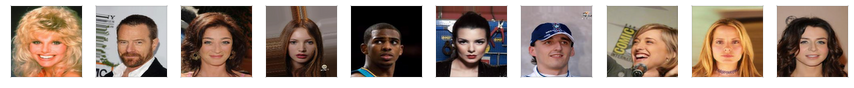

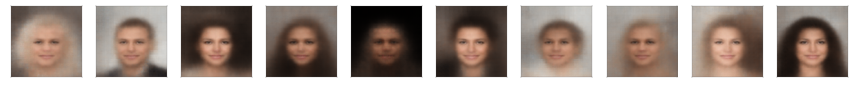

In [7]:
np.random.shuffle(x_data)

# ---- Get latent points and reconstructed images

# y_reconst = vae.predict(x_data)

z_mean, z_log_var, z_data    = vae.encoder.predict(x_data)
y_reconst = vae.decoder.predict(z_data)

# ---- Just show it

pwk.plot_images(x_data[:10],    None, columns=10, x_size=1.5,y_size=1.5, spines_alpha=0.1, save_as='01-original')
pwk.plot_images(y_reconst[:10], None, columns=10, x_size=1.5,y_size=1.5, spines_alpha=0.1, save_as='02-reconstruct')


## Step 5 - Latent space distribution

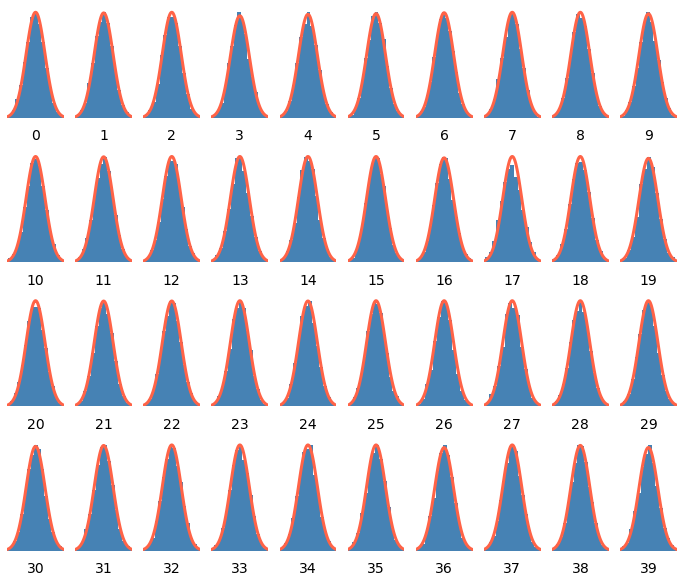

In [8]:
z_dim = z_data.shape[1]
x = np.linspace(-3, 3, 100)

fig = plt.figure(figsize=(12, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.2)

for i in range(40):
    ax = fig.add_subplot(4, 10, i+1)
    ax.hist(z_data[:,i], density=True, bins = 20)
    ax.axis('off')
    ax.set_xlim(-3,3)
    ax.text(0.5, -0.2, str(i), fontsize=14, ha='center', transform=ax.transAxes)
    ax.plot(x,norm.pdf(x))

pwk.save_fig('03-latent-space')
plt.show()

## Step 6 - Generation of new faces

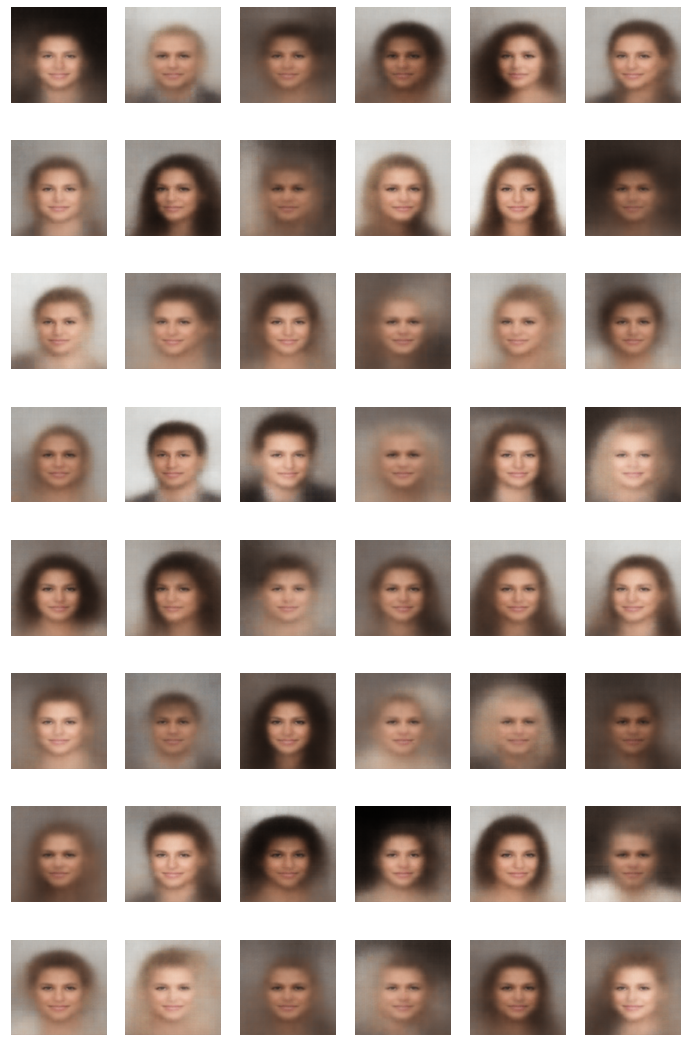

In [9]:
n_new = 48

z_new = np.random.normal( loc=0,scale=0.7,size=(n_new,z_dim) )
x_new = vae.decoder.predict(z_new)

pwk.plot_images(x_new, None, columns=6, x_size=2,y_size=2.4, spines_alpha=0,y_padding=0, save_as='04-new-faces')

## Step 7 - Playing with latent space
### 7.1 - The attributes of our images

In [10]:
display(dataset_desc.head())
for i,v in enumerate(dataset_desc.columns):
    print(f'{v:24}', end='')
    if (i+1) % 4 == 0 :print('')

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


image_id                5_o_Clock_Shadow        Arched_Eyebrows         Attractive              
Bags_Under_Eyes         Bald                    Bangs                   Big_Lips                
Big_Nose                Black_Hair              Blond_Hair              Blurry                  
Brown_Hair              Bushy_Eyebrows          Chubby                  Double_Chin             
Eyeglasses              Goatee                  Gray_Hair               Heavy_Makeup            
High_Cheekbones         Male                    Mouth_Slightly_Open     Mustache                
Narrow_Eyes             No_Beard                Oval_Face               Pale_Skin               
Pointy_Nose             Receding_Hairline       Rosy_Cheeks             Sideburns               
Smiling                 Straight_Hair           Wavy_Hair               Wearing_Earrings        
Wearing_Hat             Wearing_Lipstick        Wearing_Necklace        Wearing_Necktie         
Young                   

### 7.2 Let's find some predictable images

In [11]:
def get_latent_vector(images_desc):

    # ---- Get filenames of fex images
    
    filenames=images_desc['image_id'][:50]
    
    # ---- Retrieve images
    
    imgs=[]
    for i,filename in enumerate(filenames):
        filename = f'{dataset_img}/{filename}'
        img = io.imread(filename)
        img = transform.resize(img, image_size)
        imgs.append( img )
        pwk.update_progress('Read :',len(imgs),len(filenames))
        
    # ---- Get latent space vectors

    x_images=np.array(imgs)
    z_mean, z_log_var, z  = vae.encoder.predict(x_images)
    
    # ---- return mean vector
    
    return z.mean(axis=0)

Read :           [########################################] 100.0% of 50
Read :           [########################################] 100.0% of 50
Read :           [########################################] 100.0% of 50


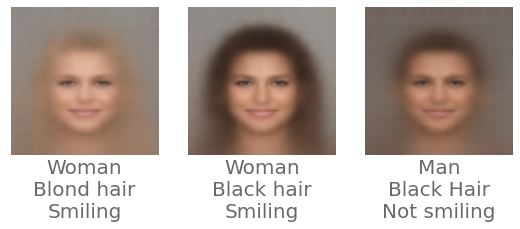

In [12]:
df = dataset_desc

z11 = get_latent_vector( df.loc[ (df['Male'] == -1)  & (df['Smiling']== 1) & (df['Blond_Hair']== 1)] )
z12 = get_latent_vector( df.loc[ (df['Male'] == -1)  & (df['Smiling']== 1) & (df['Black_Hair']== 1)] )
z21 = get_latent_vector( df.loc[ (df['Male'] ==  1)  & (df['Smiling']==-1) & (df['Black_Hair']== 1)] )

labels=['Woman\nBlond hair\nSmiling','Woman\nBlack hair\nSmiling','Man\nBlack Hair\nNot smiling']


z_images = np.array( [z11,z12,z21] )
x_images = vae.decoder.predict( z_images )
pwk.plot_images(x_images,labels,columns=3,x_size=3,y_size=3,spines_alpha=0, save_as='05-predictable')

### 7.3 - And do somme latent morphing !

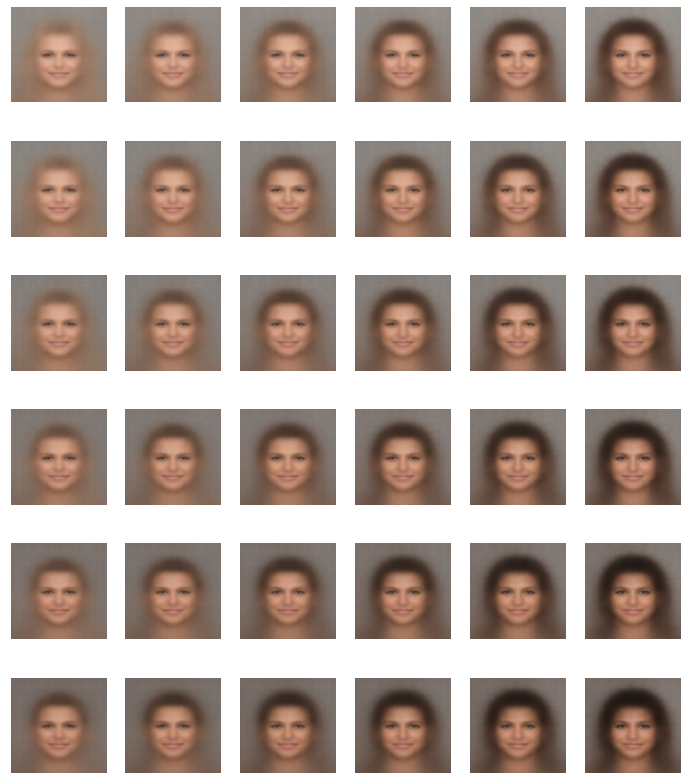

In [13]:

n=6
dj=(z12-z11)/n
di=(z21-z11)/n

z=[]
for i in range(n):
    for j in range(n):
        z.append( z11+di*i+dj*j )
#         z_images.append( z11+di*i+dj*j  + 0.5*np.random.normal(.2,.3,200))

x_images = vae.decoder.predict( np.array(z) )
pwk.plot_images(x_images,columns=n,x_size=2,y_size=2.4,y_padding=0,spines_alpha=0, save_as='06-morphing')

In [14]:
pwk.end()

End time is : Tuesday 5 January 2021, 15:23:32
Duration is : 00:01:10 597ms
This notebook ends here


---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>